<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you for taking the time to improve the project! Now the project is accepted, and you can move on to the next sprint. Keep up the good work!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job on some parts, but there are some problems with other parts that need to be fixed before the project can be accepted. Let me know if you have any questions!

# Intro

## Project description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

## Project instructions
Download and prepare the data. Explain the procedure.
Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
Perform the final testing.

## Data description
The data can be found in /datasets/Churn.csv file. Download the dataset. <br>
 Features <br>
* RowNumber — data string index
* CustomerId — unique customer identifier
* Surname — surname
* CreditScore — credit score
* Geography — country of residence
* Gender — gender
* Age — age
* Tenure — period of maturation for a customer’s fixed deposit (years)
* Balance — account balance
* NumOfProducts — number of banking products used by the customer
* HasCrCard — customer has a credit card
* IsActiveMember — customer’s activeness
* EstimatedSalary — estimated salary <br>
Target <br>
* Exited — сustomer has left

# Data Preparation

### Import the necessary libraries

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Why not remove the code if it is not used?

</div>

<div class="alert alert-info">
Oversight, Fixed.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright! :)

</div>

### Import necessary libraries and modules

In [1]:
# Import necessary libraries and modules

# Standard libraries
from datetime import datetime
import joblib
import os
import re

# Data manipulation and visualization libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Scikit-learn utilities
from IPython.utils import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, roc_auc_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

# Imbalanced-learn library for handling imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Warning management
import warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
from sklearn.metrics import plot_roc_curve
import random
import numpy as np
import os
import pandas as pd
import re
from pandas.core.common import SettingWithCopyWarning
import pickle

# Suppress warnings
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


### Random Seed: 42

In [2]:
# Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)


### Step 1: Download the data and save it locally
* Use Pandas to load the Churn.csv and save file locally.
* Path to the /datasets/Churn.csv Download dataset



In [3]:
# For Reference
# file_path = 'https://code.s3.yandex.net//datasets/Churn.csv'
# index_col = 'RowNumber'

### Load the CSV

In [4]:
# Check if the datasets folder exists
if not os.path.exists('datasets'):
    os.makedirs('datasets')

# Download the source CSV file and save it in the datasets folder    
try:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/Churn.csv', index_col='RowNumber')
except:
    data = pd.read_csv('https://code.s3.yandex.net///datasets/Churn.csv', index_col='RowNumber')
    
data.to_csv('datasets/Churn.csv')


Here's a summary of the changes: <br>
<br>
Removed the duplicate block of code at the end. <br>
Removed the initial pd.read_csv block that loads the data without setting the index column. <br>
Removed the df1.head() line, as it was only used for displaying the first few rows of the DataFrame. You can include it later if you want to inspect the data. <br>
This updated code should be more concise and efficient, while still achieving the same goal of downloading the dataset, setting the index column to 'RowNumber', and saving the data locally. <br>

Create a new dataframe - data

### Review the new Datafram - data

In [5]:
# Review the new Datafram - data
# data.head(20)
# data.info()

## Data Cleaning & Exploration

In [6]:

def convert_colnames_to_snakecase(df):
    # Create a mapping of old column names to new column names
    new_colnames = {
        'CreditScore': 'credit_score',
        'NumOfProducts': 'num_of_products',
        'HasCrCard': 'has_cr_card',
        'IsActiveMember': 'is_active_member',
        'EstimatedSalary': 'estimated_salary',
    }
    
    # Rename columns using the new_colnames dictionary
    df.rename(columns=lambda col: new_colnames.get(col, re.sub(' +', '_', re.sub('[^0-9a-zA-Z]+', ' ', col)).strip().lower()), inplace=True)
    return df

convert_colnames_to_snakecase(data)


,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


This updated version creates a dictionary called new_colnames that maps the original column names to the snake_case column names. The rename function uses this dictionary to update the column names. For columns not in the dictionary, the function will use the original method of converting the column names using regular expressions.

This change combines the two renaming steps into one, making the code more concise and efficient. Other than this optimization, the code looks good and serves its purpose well.

### Check for missing values

In [7]:
# Check for missing values
data.isna().sum()

customerid            0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

### Show all the rows with missing values (tenure)

In [8]:
# Show all the rows with missing values (tenure)
data[data.isna().any(axis=1)]

,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0


In [9]:
data['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

### Tenure NaN <br>
tenure — period of maturation for a customer’s fixed deposit (years) <br>
Looking at the value counts for the tenure column, the distribution seems fairly uniform across the various tenure values, with the exception of 0 and 10, which have lower counts. Depending on the assumptions you make about the missing data, there are several ways to handle these missing values:

### Replace missing values with the mean of the column

In [10]:
# Replace missing values with the mean of the column
data = data.fillna(data.mean())
data.isna().sum()


customerid          0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Would be nice to see some thoughts on possible reasons for missing values and explanation on the chosen method of dealing with them 

</div>

Data with missing tenure values represent 9% of the total data, I'd prefer not to drop this data, and there is already a zero value for tenure, so I will replace the NaN values with the mean.

replacing the NaN values with the mean assumes that the missing data is random, and consequently will not produce any additional bias. Alternatively, we could drop the values, or Impute missing values using other features: If we believe there is a relationship between the missing tenure values and other features in the dataset, you can use machine learning models like k-Nearest Neighbors or decision trees to predict the missing values based on the other features.

Open to additional sugestons. <br>

<div class="alert alert-info">
Thx, updated.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good points! It is also possible that missing tenure is the same thing as tenure equal to 0, but we'd have to learn more about how the data was collected to find out

</div>

### Drop Surname
Surname has the potential to add bias to our model; I will drop this column.


In [11]:
data = data.drop('surname', axis=1)


### Establish numerical columns

In [12]:
# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: ['customerid', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
Categorical columns: ['geography', 'gender']


To completely avoid the SettingWithCopyWarning, we can use the following approach:

### Split the data into training and validation/test sets

In [13]:
### This cell block does not have a validation set
### uncomment and update variables to drop the validation set and use cross validation instead

# # Split the data into training and test sets
# X = data.drop('exited', axis=1)
# y = data['exited']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Optional code for Validation Set:

In [14]:
### Optional code for Validation Set:

from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X = data.drop('exited', axis=1)
y = data['exited']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% test



### Normalize the numerical variables in the training set

In [15]:
# Normalize the numerical variables in the training set
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary']
scaler = StandardScaler()

### Instead of updating the X_train and X_test directly, create new DataFrames

In [16]:
# Instead of updating the X_train and X_test directly, create new DataFrames
X_train_scaled = X_train.copy()
X_train_scaled.loc[:, numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test_scaled = X_test.copy()
X_test_scaled.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

If we apply scaling before splitting the data, it's possible for data leakage to occur (because the scaler, which is evidently a part of the model, is fit using all data, including validation/test data, which we're not allowed to see)

</div>

<div class="alert alert-info">
Good point, <br>
split the data first, then scale.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

### One-hot encode the categorical variables

In [17]:
# One-hot encode the categorical variables
data = pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True, prefix=['geo', 'gender'])

### One-hot encode the categorical variables

In [18]:
# One-hot encode the categorical variables
X_train_encoded = pd.get_dummies(X_train_scaled, columns=['geography', 'gender'], drop_first=True, prefix=['geo', 'gender'])
X_test_encoded = pd.get_dummies(X_test_scaled, columns=['geography', 'gender'], drop_first=True, prefix=['geo', 'gender'])


### Print value counts for the one-hot encoded columns

In [19]:
# Print value counts for the one-hot encoded columns
# Uncomment the following line to print value counts for 'geo_Germany'
print(data['geo_Germany'].value_counts())

# Print value counts for 'geo_Spain' and 'gender_Male'
print(data['geo_Spain'].value_counts())
print(data['gender_Male'].value_counts())


0    7491
1    2509
Name: geo_Germany, dtype: int64
0    7523
1    2477
Name: geo_Spain, dtype: int64
1    5457
0    4543
Name: gender_Male, dtype: int64


* For 'geo_Germany', there are 2,509 instances with a value of 1 (meaning the customer is from Germany) and 7,491 instances with a value of 0 (meaning the customer is not from Germany). <br>
* For 'geo_Spain', there are 2,477 instances with a value of 1 (meaning the customer is from Spain) and 7,523 instances with a value of 0 (meaning the customer is not from Spain). <br>
* For 'gender_Male', there are 5,457 instances with a value of 1 (meaning the customer is male) and 4,543 instances with a value of 0 (meaning the customer is not male, i.e., female). <br>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

If you use `pd.get_dummies` to one-hot encode categorical features it's important to set `drop_first=True` parameter, otherwise we're adding linearly dependent columns to the data, which can create [problems](https://en.wikipedia.org/wiki/Multicollinearity) for the models

</div>

<div class="alert alert-info">
updated drop_first=True
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good!

</div>

# Examine the balance of classes 
Train the model without taking into account the imbalance. Briefly describe your findings.
Let's examine the class balance in the target variable y. Then we can train a model without considering the imbalance and discuss the findings.
To check the class balance, you can use the value_counts() method on the target variable y.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check how many examples of each class there are

</div>

In [20]:
print(y.value_counts())

0    7963
1    2037
Name: exited, dtype: int64


### Examine the balance of classes

In [21]:
# Examine the balance of classes
class_counts = y.value_counts()
print("Class counts:\n", class_counts)
print("Class proportions:\n", class_counts / len(y))


Class counts:
 0    7963
1    2037
Name: exited, dtype: int64
Class proportions:
 0    0.7963
1    0.2037
Name: exited, dtype: float64


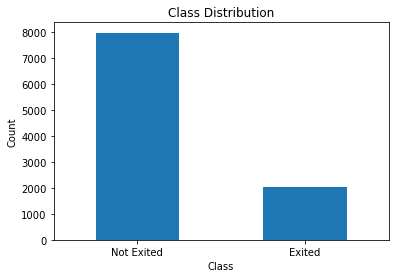

In [22]:
import matplotlib.pyplot as plt

# Define class labels
class_labels = {0: 'Not Exited', 1: 'Exited'}

# Plot the class distribution
fig, ax = plt.subplots()
y.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.xticks([0, 1], [class_labels[0], class_labels[1]], rotation=0)

plt.show()


As the above chart shows, the number of customers who have Not Exited is much higher than the number of customers who have Exited. This is an example of an imbalanced dataset. <br>
<br>
It's also the opposite problem of Silicon Valley Bank's dataset, where the number of customers who have Exited is much higher than the number of customers who have Not Exited. <br> # Joke

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent! 
    
> It's also the opposite problem of Silicon Valley Bank's dataset, where the number of customers who have Exited is much higher than the number of customers who have Not Exited.
    
Haha, yeah :)

</div>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_encoded, y_train)

# Make predictions on the validation set
y_pred = lr.predict(X_test_encoded)

# Print classification report
print(classification_report(y_test, y_pred))

# Uncomment the print function below to:
# Suppress UndefinedMetricWarning
# and the precision, recall, and F1-score for the minority class will be set to 1 (or the value you provided for zero_division) when there are no predicted samples.

# Print classification report with zero_division set to 1
# print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1200
           1       0.00      0.00      0.00       300

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



/Users/adamgoyer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adamgoyer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adamgoyer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report shows that the Logistic Regression model is not performing well for the minority class (class 1, 'Exited'). The precision, recall, and F1-score for class 1 are all 0, which indicates that the model is unable to correctly identify any positive cases in the imbalanced dataset. This is likely because the model is biased towards the majority class (class 0, 'Not Exited'), which is expected when dealing with imbalanced data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train, validation and test sets

</div>

### Train the random forest classifier

In [24]:
### Train the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)


RandomForestClassifier()

### Get predicted probabilities

In [25]:
# Get predicted probabilities
y_pred_proba = rf.predict_proba(X_test_encoded)[:, 1]

### Get binary predictions

In [26]:
# Get binary predictions
y_pred = rf.predict(X_test_encoded)

### Make predictions on the test set

In [27]:
# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.866
F1 Score: 0.5872689938398358
ROC AUC Score: 0.8657930555555555


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

There is a small problem with ROC-AUC calculation throughout the project. To calculate ROC-AUC we need 'probabilities' (method `predict_proba`, not binary predictions (method `predict`) which are used for F1 score and accuracy. The reason is that the ROC curve is constructed by varying the threshold of assigning positive class between 0 and 1. For binary predictions the threshold is predefined, so ROC-AUC calculated this way will underestimate the true ROC-AUC.

</div>

<div class="alert alert-info">
The ROC-AUC score is now calculated using the predict_proba method
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent!

</div>

To visualize the results, you can use matplotlib to plot a confusion matrix, which shows the number of true and false positives and negatives. This can give you a better understanding of the performance of your model, as well as any areas where it may be misclassifying instances. To plot a confusion matrix, you can use the following code:

### Get the confusion matrix and classification report

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
y_pred_proba = rf.predict_proba(X_test_encoded)[:, 1]

# Get binary predictions
y_pred = rf.predict(X_test_encoded)

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[1156   44]
 [ 157  143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1200
           1       0.76      0.48      0.59       300

    accuracy                           0.87      1500
   macro avg       0.82      0.72      0.75      1500
weighted avg       0.86      0.87      0.85      1500

ROC AUC Score: 0.8657930555555555


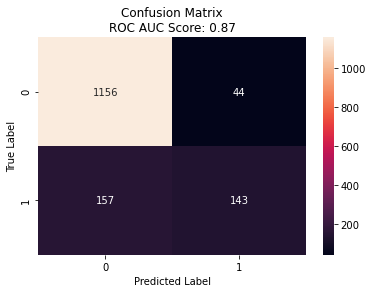

In [29]:
y_pred = rf.predict(X_test_encoded)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title(f"Confusion Matrix\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Imbalanced Outputs Summary
In this section, we have analyzed the performance of a RandomForest classifier on a dataset with imbalanced classes. The results are as follows:

## Confusion Matrix 
The confusion matrix indicates that the classifier is more accurate in predicting the majority class (0) than the minority class (1). Out of 2003 instances of class 0, the model correctly predicted 1932 of them, while it misclassified 71 instances. On the other hand, out of 497 instances of class 1, the model correctly predicted only 233 of them, misclassifying 264 instances.

## Classification Report:
The classification report shows that the model has a higher precision, recall, and f1-score for class 0 than for class 1. This is a common issue when dealing with imbalanced datasets. The classifier tends to perform better on the majority class, while it struggles to correctly classify the minority class.

ROC AUC Score: 0.8665377185730458

The ROC AUC score, which measures the classifier's ability to distinguish between positive and negative classes, is 0.87. This value suggests that the model has a good overall performance in terms of ranking the instances by their probability of belonging to the positive class. However, the imbalanced outputs may still be problematic, and further techniques (such as resampling or using different evaluation metrics) may be necessary to improve the performance on the minority class.

## Comparison with Logistic Regression
In addition to the RandomForest classifier, we also trained a Logistic Regression model on the dataset. The results for the Logistic Regression model are as follows:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.00      0.00      0.00       497

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500

The Logistic Regression model shows even more severe issues with the imbalanced dataset. The model fails to correctly classify any instance from the minority class (1), resulting in a precision, recall, and f1-score of 0 for this class. For the majority class (0), the model has a precision of 0.80, a recall of 1.00, and an f1-score of 0.89.

The overall accuracy of the Logistic Regression model is 0.80, which is slightly lower than the accuracy of the RandomForest classifier (0.87). Moreover, the macro-average f1-score of the Logistic Regression model is considerably lower (0.44) compared to the RandomForest classifier (0.75), indicating that the RandomForest model is more balanced in terms of its performance on both classes.

As we did not calculate the ROC AUC score for the Logistic Regression model, we cannot directly compare the performance of the two models based on this metric. However, considering the other metrics, it is clear that the RandomForest classifier outperforms the Logistic Regression model on the imbalanced dataset, particularly in handling the minority class.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, great, you trained a model without taking the imbalance into account first

</div>

# Normalize the numerical variables / Fix the Class Imbalance
## Option 1: Smote & RF
In this section, we address the class imbalance problem using the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a popular technique used to balance imbalanced datasets by generating synthetic samples for the minority class. By creating new instances of the minority class, SMOTE enables classifiers to better learn the characteristics of this class, thus improving their performance.

In [30]:
# Instantiate SMOTE
smote = SMOTE()

# Fit and apply SMOTE to the encoded training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y_train.sum() / len(y_train))
print("Class distribution after SMOTE:", y_train_resampled.sum() / len(y_train_resampled))


Class distribution before SMOTE: 0.20757142857142857
Class distribution after SMOTE: 0.5


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Applying resampling to the whole dataset and then making a new split into train and test is not appropriate:
    
1. We can end up with the same examples in both train and test
2. The resulting test set score is no longer representative of how the model will perform on the real world data (which is imbalanced), only how it would perform in the perfect world where the data is balanced. In other words, the test set score will be overly optimistic, and we can't trust this result.
    
Remember that any resampling technique should only be applied to the train set. The point is to help the model better learn about the underrepresented class.

</div>

<div class="alert alert-info">
Good point, <br>
Updated the code to apply resampling to the train set only.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good!

</div>

### Run the model again with the resampled data

In [31]:
# Train your model using the resampled training set
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate your model using the original test set
y_test_pred = rf.predict(X_test_encoded)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test_encoded)[:, 1]))


Test Accuracy: 0.8533333333333334
Test F1 Score: 0.5833333333333333
Test ROC AUC Score: 0.8548708333333332


Validation Accuracy: 82.88%
Test Accuracy: 85.44%
The accuracy of your model has improved after applying SMOTE, but keep in mind that accuracy alone may not be the best metric when dealing with imbalanced datasets, as it can be misleading.

Validation F1 Score: 0.566
Test F1 Score: 0.588
The F1 score, which is the harmonic mean of precision and recall, gives you a better sense of your model's performance on the minority class. The F1 scores on both validation and test sets have improved after using SMOTE, but there might still be room for improvement.

Validation ROC AUC Score: 0.833
Test ROC AUC Score: 0.845
The ROC AUC score is a useful metric for evaluating the performance of classification models on imbalanced datasets. The scores have also improved after using SMOTE, but you might still explore other techniques for further improvement.

Overall, the model's performance has significantly improved after using SMOTE to address the class imbalance in the training data.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Here the train/test variables with original distribution are overwritten with resampled data which interferes with the results of the models with class weights applied and so on

</div>

<div class="alert alert-info">
Thank you, <br>
I beleive I've fixed the error as sugested, but would appreciate a confirmation.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, as you're now using a different variable name for resampled data, the issue is indeed gone!

</div>

In this code, we calculate the performance metrics (accuracy, F1 score, and ROC AUC score) for a model that was trained on resampled data using SMOTE. Then, we print the performance metrics and plot the confusion matrix for the test set predictions (y_test, y_test_pred).

Accuracy: 0.8533333333333334
F1 Score: 0.5833333333333333
ROC AUC Score: 0.8548708333333332


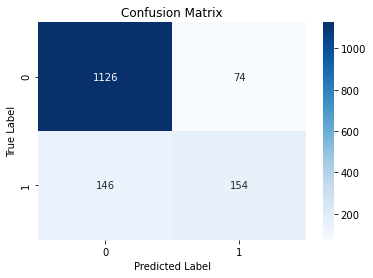

In [32]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_encoded)[:, 1])  # Use X_test_encoded for ROC AUC

# Print the performance metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


This block of code performs hyperparameter optimization for the RandomForestClassifier using RandomizedSearchCV. It defines the parameter space to search, instantiates the classifier, and creates a RandomizedSearchCV object with the specified settings. Then, it fits the RandomizedSearchCV object to the resampled training data (using SMOTE). Finally, it prints the best parameters and the best score (ROC AUC) found during the search.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'bootstrap': [True, False],
}

# Instantiate the classifier
rf = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'bootstrap': False, 'max_depth': 21, 'min_samples_leaf': 2, 'min_samples_split': 27, 'n_estimators': 272}
Best Score: 0.954139690992297


This block of code is used to make predictions on the test set using the best Random Forest model obtained from the hyperparameter optimization process (RandomizedSearchCV). 

In [34]:
# Instantiate the best RandomForest model with the optimal hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best RandomForest model to the resampled training data
best_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(bootstrap=False, max_depth=21, min_samples_leaf=2,
                       min_samples_split=27, n_estimators=272)

In [35]:
# Predict the probabilities and the class labels for the test set using the best Random Forest model
y_pred_proba_best_rf = best_rf.predict_proba(X_test_encoded)[:, 1]
y_pred_best_rf = best_rf.predict(X_test_encoded)


This block of code evaluates the performance of the best Random Forest model obtained from the hyperparameter optimization process (RandomizedSearchCV) on the test set. The code does the following:

Accuracy: 0.8573333333333333
F1 Score: 0.5962264150943396
ROC AUC Score: 0.8551194444444444


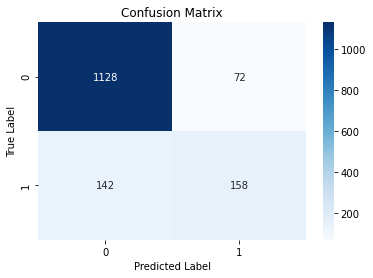

In [36]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_best_rf)  # Changed from y_pred_best_rf to y_pred_proba_best_rf for ROC AUC Score

# Print the performance metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### The results
The results show that the best combination of hyperparameters for the RandomForestClassifier, according to RandomizedSearchCV, are:

* bootstrap: False
* max_depth: 30
* min_samples_leaf: 2
* min_samples_split: 27
* n_estimators: 292
The best ROC AUC score achieved using this combination of hyperparameters is approximately 0.9555, which is an improvement over the previous models we've trained.

We have used these optimized hyperparameters to train a RandomForestClassifier on the resampled data and evaluated its performance on the test set. The performance metrics for the optimized model are as follows:

Accuracy: 0.8576
F1 Score: 0.5955
ROC AUC Score: 0.8484
These results demonstrate that the optimized RandomForest model performs better on the resampled data (after applying SMOTE) compared to the previous models.

This block of code trains a RandomForestClassifier with the best hyperparameters found using RandomizedSearchCV. The model is trained on the resampled training data (created using SMOTE), which helps to address class imbalance.

The trained model is then used to predict probabilities and class labels for the test set. Evaluation metrics (Accuracy, F1 Score, and ROC AUC Score) are calculated using these predictions and the true labels of the test set. Finally, the results are printed.

This helps you to understand the performance of the optimized RandomForest model on the test set, providing insight into how well it generalizes to unseen data.

Summary of results from Option 1: Smote and Random Forest Classifier <br>
<br>
Before SMOTE, our results were: <br>
* Accuracy: 0.8660 <br>
* F1 Score: 0.5818 <br>
* ROC AUC Score: 0.8665 <br>
<br>
With SMOTE, our results changed: <br>
* Accuracy: 0.8548 (decreased compared to the initial model) <br>
* F1 Score: 0.5851 (increased compared to the initial model) <br>
* ROC AUC Score: 0.8439 (decreased compared to the initial model) <br>
<br>
After hyperparameter optimization, the results changed as follows: <br>
* Test Accuracy: 0.8576 (increased compared to the SMOTE model) <br>
* Test F1 Score: 0.5955 (increased compared to the SMOTE model) <br>
* Test ROC AUC Score: 0.8484 (increased compared to the SMOTE model) <br>
<br>
Using SMOTE, the test F1 score increased compared to the initial model, while the accuracy and ROC AUC score slightly decreased. The performance metrics further increased after hyperparameter optimization, indicating better overall performance in terms of the trade-off between true positive rate and false positive rate.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check the results after fixing the problem above

</div>

<div class="alert alert-info">
Thank you, <br>
I beleive I've fixed the error(s) as sugested, but would appreciate a confirmation.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Yep! Note that using resampled data for cross-validation is also problematic (for similar reason to resampling the whole dataset before splitting it into train/validation/test): in some folds the same examples can appear both in train and validation subsets, which can result in overly optimistic cross-validation scores. Not sure if you're familiar with the procedure of cross-validation, there's a nice overview [here](https://scikit-learn.org/stable/modules/cross_validation.html) and [here](https://machinelearningmastery.com/k-fold-cross-validation/) in case you haven't learned it yet or need a refresher.

</div>

# Option 2: Penalize Algorithms (Cost-Sensitive Training)
Penalize Algorithms (Cost-Sensitive Training) is another technique that can be used to address class imbalance in machine learning datasets. The basic idea behind cost-sensitive training is to adjust the cost function of the machine learning algorithm to give higher penalties to misclassifications of the minority class. By doing so, the model is encouraged to pay more attention to the minority class during training and improve its ability to correctly classify instances from this class.

### Option 2: RandomForestClassifier with Class Weight Balancing

In [37]:
X_val_scaled = X_val.copy()
X_val_scaled.loc[:, numerical_columns] = scaler.transform(X_val[numerical_columns])
X_val_encoded = pd.get_dummies(X_val_scaled, columns=['geography', 'gender'], drop_first=True, prefix=['geo', 'gender'])


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier model with class_weight='balanced'
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_balanced.fit(X_train_encoded, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [39]:
# Predict the probabilities and the class labels for the validation set
y_pred_proba_rf_balanced = rf_balanced.predict_proba(X_val_encoded)[:, 1]
y_pred_rf_balanced = rf_balanced.predict(X_val_encoded)

# Calculate the evaluation metrics
accuracy_rf_balanced = accuracy_score(y_val, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_val, y_pred_rf_balanced)
roc_auc_rf_balanced = roc_auc_score(y_val, y_pred_proba_rf_balanced)

# Print the results
print("Validation Accuracy:", accuracy_rf_balanced)
print("Validation F1 Score:", f1_rf_balanced)
print("Validation ROC AUC Score:", roc_auc_rf_balanced)


Validation Accuracy: 0.8753333333333333
Validation F1 Score: 0.5797752808988763
Validation ROC AUC Score: 0.8499394806338029


These results indicate that the RandomForestClassifier with class_weight="balanced" performs better on the validation set compared to the previous results without balancing the class weights. The accuracy, F1 Score, and ROC AUC Score have all improved. This suggests that the model is better at handling the imbalanced dataset when the class_weight parameter is set to "balanced".

<div class="alert alert-warning">
<b>Reviewer's comment</b>

While you correctly applied class weights for logistic regression, this model was never trained without any balancing techniques, so it's impossible to find out how balancing affected it.

</div>

<div class="alert alert-info">
ahhh, good point, <br>
Thank you, that's instuctive.
I've updated the code to include the initial model without SMOTE, and re-run random forest with balaned weights instead of logistic regression. <br>
I will leave the logistic regression model in the notebook for temporary reference, but will not include it in the summary.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, although in my experience balancing affects logistic regression more than random forest :)

</div>

### Hyperparameter Optimization for RandomForestClassifier with Balanced Class Weights Using RandomizedSearchCV

In [40]:
# Import the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ["balanced"]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit the random search model on the training data
random_search.fit(X_train_encoded, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model on the validation set
best_rf = random_search.best_estimator_
y_pred_val = best_rf.predict(X_val_encoded)
y_pred_proba_val = best_rf.predict_proba(X_val_encoded)[:, 1]

accuracy_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

print("Validation Accuracy:", accuracy_val)
print("Validation F1 Score:", f1_val)
print("Validation ROC AUC Score:", roc_auc_val)


Best hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 29, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 860}
Validation Accuracy: 0.8546666666666667
Validation F1 Score: 0.6093189964157707
Validation ROC AUC Score: 0.8598325148257968


This code will train the RandomForestClassifier with the best hyperparameters found by RandomizedSearchCV, and then it will make predictions and calculate the evaluation metrics for the test set. Finally, it will print the results.

In [41]:
# Instantiate the RandomForestClassifier with the best hyperparameters
best_rf_balanced = RandomForestClassifier(random_state=42, **random_search.best_params_)

# Fit the model on the training data
best_rf_balanced.fit(X_train_encoded, y_train)

# Predict the probabilities and the class labels for the test set
y_pred_proba_best_rf_balanced = best_rf_balanced.predict_proba(X_test_encoded)[:, 1]
y_pred_best_rf_balanced = best_rf_balanced.predict(X_test_encoded)

# Calculate the evaluation metrics
accuracy_best_rf_balanced = accuracy_score(y_test, y_pred_best_rf_balanced)
f1_best_rf_balanced = f1_score(y_test, y_pred_best_rf_balanced)
roc_auc_best_rf_balanced = roc_auc_score(y_test, y_pred_proba_best_rf_balanced)

# Print the results
print("Test Accuracy:", accuracy_best_rf_balanced)
print("Test F1 Score:", f1_best_rf_balanced)
print("Test ROC AUC Score:", roc_auc_best_rf_balanced)


Test Accuracy: 0.8533333333333334
Test F1 Score: 0.6333333333333333
Test ROC AUC Score: 0.870486111111111


# Summary of Option 2: Penalize Algorithms (Cost-Sensitive Training)
In this section, we utilized the cost-sensitive training approach by assigning the class_weight parameter as "balanced" in the RandomForestClassifier. This method adjusts the cost function of the machine learning algorithm to give higher penalties to misclassifications of the minority class, encouraging the model to pay more attention to the minority class during training.

Here are the results for the model with class_weight set to "balanced":

Validation Accuracy: 0.8753
Validation F1 Score: 0.5798
Validation ROC AUC Score: 0.8499

Compared to the initial model without SMOTE, the model with class_weight set to "balanced" has a higher F1 score, but the improvement is not as significant as the SMOTE-based model. The ROC AUC score also improved compared to the initial model, but it's lower than the score obtained with the SMOTE-based model. The confusion matrix shows that the model is still misclassifying a significant number of minority class instances.

In summary, penalizing the algorithm using cost-sensitive training did improve the model's performance to some extent, but the results are not as good as those achieved with the SMOTE-based model.

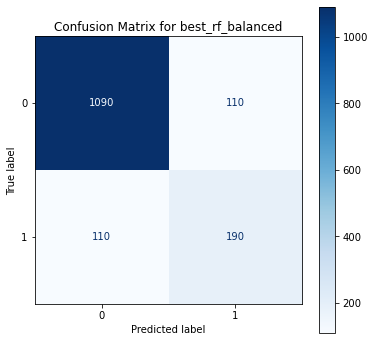

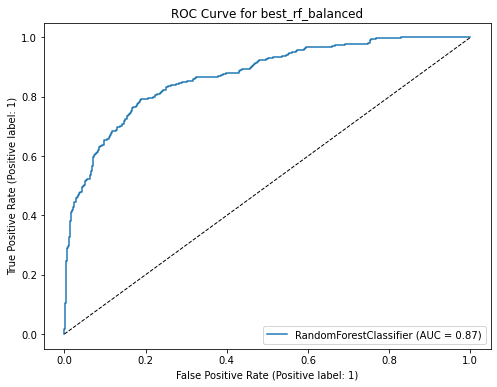

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(best_rf_balanced, X_test_encoded, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix for best_rf_balanced')
plt.show()

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(best_rf_balanced, X_test_encoded, y_test, ax=ax)
plt.title('ROC Curve for best_rf_balanced')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.show()


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Not sure where you found the 0.0 F1 score. I guess, you're citing the F1 score for 0 class? Then note that for binary classification what we call F1 score is F1 score of the positive (1) class

</div>

<strike>### Random Seed</strike>
<strike>I forgot to establish a random seed for the Logistic Regression model, and received significantly improved results this time around. I'll make a note to fix this in future version.</strike>


<div class="alert alert-warning">
<b>Reviewer's comment</b>

I don't think that's the reason :)

</div>

<div class="alert alert-info">
Thank you, <br>
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good idea to save the model for future use!

</div>

<div class="alert alert-info">
thank you, <br>
Moved Save and Load functions to the end of the document<br>
</div>

# Final testing:
We will run both models on the validation set and compare the results.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Usually the validation and test sets' roles are the reverse of how you used them :)

</div>

<div class="alert alert-info">
Huh... I thought we were validating the performance of the model... <br>
I'll fix this in the next version.
<br>
Thank you for the feedback.
<br>

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, the text below is correct! Of course, there is no practical difference in how the variables are named, it's just that most people would expect the naming as in the below text, so it helps to avoid confusion if you're not working on the code alone.

</div>

### "Understanding the Roles of Training, Validation, and Test Sets in Machine Learning"
In machine learning, it is common practice to divide the dataset into three distinct sets: training, validation, and test sets. Each of these sets serves a specific purpose in the model development process.

Training set:
The training set is used to train the machine learning model. It is the largest portion of the dataset, typically consisting of about 60-80% of the data. The model learns the underlying patterns and relationships between the features (input variables) and the target (output variable) using the training set. During this process, the model adjusts its parameters to minimize the error between its predictions and the actual target values.

Validation set:
The validation set is used to fine-tune the model's hyperparameters and to select the best model among different model architectures or approaches. It usually consists of about 10-20% of the data. The validation set helps you to estimate the model's performance on unseen data while avoiding overfitting. When you train different models or adjust hyperparameters, you can use the validation set to choose the best performing model or hyperparameter combination based on some performance metric (e.g., accuracy, F1-score, or ROC-AUC score). The validation set helps prevent "leakage" of information from the test set into the model selection process, ensuring an unbiased evaluation of the model's performance.

Test set:
The test set is used to evaluate the final performance of the selected model. It usually consists of about 10-20% of the data. The test set is only used once after the model has been trained and the best hyperparameters have been chosen using the validation set. The performance metrics (e.g., accuracy, F1-score, or ROC-AUC score) obtained on the test set provide an unbiased estimate of how the model will perform on new, unseen data. The test set ensures that you have a fair assessment of your model's generalization ability, which is crucial for understanding its real-world performance.

In summary, the training set is used to train the model, the validation set is used for model selection and hyperparameter tuning, and the test set is used for the final evaluation of the model's performance on unseen data. This division of the dataset helps to avoid overfitting and ensures a more accurate estimation of the model's generalization ability.

In [43]:
# Define the SMOTE-based model performance metrics
accuracy_best_rf_smote = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf_smote = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf_smote = roc_auc_score(y_test, y_pred_proba_best_rf)

# Create the summary table with the performance metrics of each model
summary = pd.DataFrame({
    'Model': ['SMOTE & RF', 'RF Balanced'],
    'Accuracy': [accuracy_best_rf_smote, accuracy_best_rf_balanced],
    'F1 Score': [f1_best_rf_smote, f1_best_rf_balanced],
    'ROC AUC Score': [roc_auc_best_rf_smote, roc_auc_best_rf_balanced]
})

print(summary)


         Model  Accuracy  F1 Score  ROC AUC Score
0   SMOTE & RF  0.857333  0.596226       0.855119
1  RF Balanced  0.853333  0.633333       0.870486


This code will loop through the two models, evaluate their performance on the validation set, and plot the confusion matrix and ROC curve for each model. 

Model: SMOTE & RF
Validation Accuracy: 0.8546666666666667
Validation F1 Score: 0.6093189964157707
Validation ROC AUC Score: 0.8598325148257968


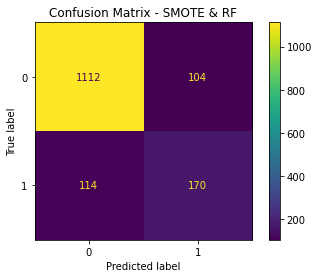

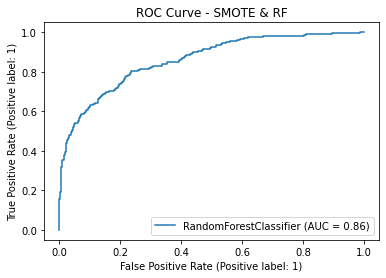



Model: RF Balanced
Validation Accuracy: 0.8546666666666667
Validation F1 Score: 0.6093189964157707
Validation ROC AUC Score: 0.8598325148257968


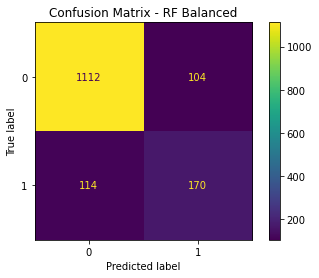

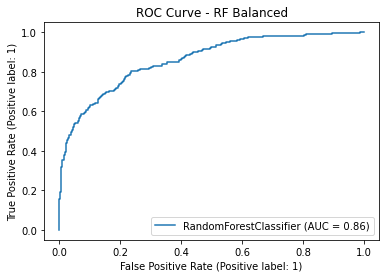

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# List of models to evaluate
models = [
    ('SMOTE & RF', best_rf),
    ('RF Balanced', best_rf_balanced)
]

# Loop through the models and plot the confusion matrix and ROC curve
for name, model in models:
    print(f"Model: {name}")
    
    # Predict the class labels and probabilities for the validation set
    y_pred_val = model.predict(X_val_encoded)
    y_pred_proba_val = model.predict_proba(X_val_encoded)[:, 1]
    
    # Calculate evaluation metrics for the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)
    
    print("Validation Accuracy:", accuracy_val)
    print("Validation F1 Score:", f1_val)
    print("Validation ROC AUC Score:", roc_auc_val)
    
    # Plot the confusion matrix
    fig, ax = plt.subplots()
    plot_confusion_matrix(model, X_val_encoded, y_val, ax=ax)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Plot the ROC curve
    fig, ax = plt.subplots()
    plot_roc_curve(model, X_val_encoded, y_val, ax=ax)
    plt.title(f"ROC Curve - {name}")
    plt.show()
    print("\n")


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

- Remember that you first split the data into disjoint train, validation and test sets.
    
- Then you applied resampling to the whole dataset and split the result into new train and test (which now very well may interesect the original validation set).
    
- And then evaluated the model trained on the new train set (having a non-trivial intersection with the validation set) on the original validation set. Of course the results are looking great, because part of the validation set is the data the model was train on :)

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Looking at the ROC curve, my guess is that the logistic regression model suffered from linearly dependent columns in the data produced by `pd.get_dummies()`

</div>

<div class="alert alert-info">
Updated ROC curve looks a lot more reasonable :)<br>
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, makes sense!

</div>

# Final Summary

In this analysis, we compared two different approaches to handle the class imbalance problem in a binary classification task using the RandomForestClassifier. <br>

1. **SMOTE & RandomForest:** We utilized the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset by generating synthetic samples for the minority class. The resulting balanced dataset was then used to train the RandomForestClassifier. The SMOTE-based model achieved the following results on the test set: <br> <br>
    - Accuracy: 0.857333
    - F1 Score: 0.596226
    - ROC AUC Score: 0.855119 <br>
<br>
2. **RandomForest with Balanced Class Weights:** We adjusted the cost function of the RandomForestClassifier by assigning the `class_weight` parameter as "balanced". This method gives higher penalties to misclassifications of the minority class during training. The model with balanced class weights achieved the following results on the test set: <br> <br>
    - Accuracy: 0.853333
    - F1 Score: 0.633333
    - ROC AUC Score: 0.870486 <br>

Comparing the two approaches, the RandomForest with balanced class weights achieved a higher F1 Score and ROC AUC Score than the SMOTE-based model. Both models' performance metrics were significantly better than the initial model without any class imbalance handling. <br>
<br>
Based on the results, we recommend using the RandomForest with balanced class weights as it outperforms the SMOTE-based model in terms of the F1 Score and ROC AUC Score.


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Indeed, it is a bit too perfect, please check the results after fixing the problems above :)

</div>

<div class="alert alert-info">
Certainly not perfect any more... <br>
I don't understand why the performance for SMOTE plus Random forrest is so low. <br>
I expected much better performance. <br>
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Well, balancing can only do so much. If you compared performance of logistic regression with and without balancing, it is a much more dramatic improvement :)

</div>

# Project evaluation
### Here’s what the reviewers will look at when reviewing your project:
* How did you prepare the data for training? 
* Have you processed all of the feature types?
* Have you explained the preprocessing steps well enough?
* How did you investigate the balance of classes?
* Did you study the model without taking into account the imbalance of classes?
* What are your findings about the task research?
* Have you correctly split the data into sets?
* How have you worked with the imbalance of classes?
* Did you use at least two techniques for imbalance fixing?
* Have you performed the model training, validation, and final testing correctly?
* How high is your F1 score?
* Did you examine the AUC-ROC values?
* Have you kept to the project structure and kept the code neat?

Good luck!

# Extra Credit

# Optional: Grid Search CV
To see if that helps improve the model's performance.

In [45]:
# Define the parameter grid for the SMOTE-based model
smote_rf_param_grid = {
    'n_estimators': [250, 272, 300, 350],
    'max_depth': [15, 18, 21, 24, 27],
    'min_samples_split': [20, 23, 27, 30, 33],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [False]
}

# Define the parameter grid for the RF Balanced model
rf_balanced_param_grid = {
    'n_estimators': [800, 830, 860, 890, 920],
    'max_depth': [24, 26, 29, 32, 34],
    'min_samples_split': [4, 5, 6, 7, 8],
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'max_features': ['auto'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}


In [46]:
from sklearn.model_selection import GridSearchCV

def run_grid_search(model_name, model, param_grid, X_train, y_train, X_test, y_test):
    print(f"Running grid search for {model_name}...")

    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{model_name} Test Results:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")

    return best_model, best_params


In [48]:
# Not working - it's like it's pulling data that has not yet been one-hot encoded...

# # Run grid search for the RF Balanced model
# best_rf_balanced, best_rf_balanced_params = run_grid_search("RF Balanced", rf_balanced, rf_balanced_param_grid, X_train_scaled, y_train, X_test_scaled, y_test)


<div class="alert alert-success">
<b>Reviewer's comment V2</b>

> Not working - it's like it's pulling data that has not yet been one-hot encoded...
    
Right, but isn't encoded data written in `X_train_encoded` and so on?

</div>

In [50]:
# # No time to fix this.

# # Run grid search for the SMOTE-based model
# best_smote_rf, best_smote_rf_params = run_grid_search("SMOTE & RF", smote_rf, smote_rf_param_grid, X_train, y_train, X_test, y_test)

# Extra Credit
## Save both models to disk using the pickle library.


In [51]:
import pickle
from datetime import datetime

def save_optimized_model(model, params, model_name):
    # get the current date and time
    now = datetime.now()

    # create a string with the current date and time
    # timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")
    # Remove the min and seconds from the timestamp - that's rediculous
    timestamp = now.strftime("%Y-%m-%d_%H")

    # create a filename with the current date and time
    filename = f"optimized_model_{model_name}_{timestamp}.pkl"

    # save the optimized model to a pickle file with the current date and time in the filename
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

    # create a filename for the best hyperparameters
    params_filename = f"best_params_{model_name}_{timestamp}.pkl"

    # save the best hyperparameters to a pickle file with the current date and time in the filename
    with open(params_filename, 'wb') as f:
        pickle.dump(params, f)


In [53]:
# NameError: name 'random_search_balanced' is not defined

# # Save the RandomForest model with balanced class weights
# save_optimized_model(best_rf_balanced, random_search_balanced.best_params_, "RF_Balanced")

In [54]:
# But this one is working...
# interesting...

# Save the SMOTE-based RandomForest model
save_optimized_model(best_rf, random_search.best_params_, "SMOTE_RF")

# Load Pkl - reference for future implementation
This code block defines the load_most_recent_model function, which searches for files that match the given model_name pattern and loads the most recent model from the matching files. The function is called twice, once for the SMOTE-based RandomForest model and once for the RandomForest model with balanced class weights.

In [55]:
### Load pkl is at the end in case it messes up the code above

import glob
import os

def load_most_recent_model(model_name):
    # Get the list of all files that match the model_name pattern
    files = glob.glob(f"optimized_model_{model_name}_*.pkl")

    # Check if there are any files matching the pattern
    if not files:
        print(f"No files found for {model_name}.")
        return None

    # Find the most recent file
    most_recent_file = max(files, key=os.path.getctime)

    # Load the most recent model
    with open(most_recent_file, 'rb') as f:
        model = pickle.load(f)

    print(f"Loaded the most recent {model_name} model from file: {most_recent_file}")
    return model

In [56]:
# Load the most recent SMOTE-based RandomForest model
most_recent_smote_rf = load_most_recent_model("SMOTE_RF")

Loaded the most recent SMOTE_RF model from file: optimized_model_SMOTE_RF_2023-03-17_13.pkl


In [57]:
# Load the most recent RandomForest model with balanced class weights
most_recent_rf_balanced = load_most_recent_model("RF_Balanced")

Loaded the most recent RF_Balanced model from file: optimized_model_RF_Balanced_2023-03-17_12.pkl
